In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.error_functions import *
from src.visualization import *
from src.evaluation import *
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


# Load Data

In [5]:
EPOCHS = 1
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 50
LOSS = smape
FEATUERS_NUMBER = 2

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE)

# Train The Model

In [6]:
model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        output_size=HORIZON*2, learning_rate=0.001, loss = LOSS, dropout_ratio = 0.3, features_number = FEATUERS_NUMBER)

model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

hist = model.evaluate(validation_data_generator)
print(hist)

Epoch 1/1
8/8 [==============================] - 0s 35ms/step
107.3588497625032


# Save The Model

In [5]:
MODEL_BASE_DIR = '../models/with_diff/3-LSTM'
model.save(MODEL_BASE_DIR)

Saved model files to disk under../models/with_diff/3-LSTM/3


# Get Best And Worst Predictions

In [7]:
x, y, prediction, error =  sort_by_prediction_error(model, test_x, test_y, smape, features_number= FEATUERS_NUMBER)

print(f'Best Predection Error is {error[0]:10.4f}')
print(f'Worst Predection Error is {error[x.shape[0]-1]:10.4f}')

plot_serie_and_prediction(x[:,:48], y[:,:48], prediction[:,:48], serie_indx=0)
plot_serie_and_prediction(x[:,:48], y[:,:48], prediction[:,:48], serie_indx= x.shape[0]-1)

TypeError: sort_by_prediction_error() got an unexpected keyword argument 'features_number'

# PLot Specific Serie From A Batch

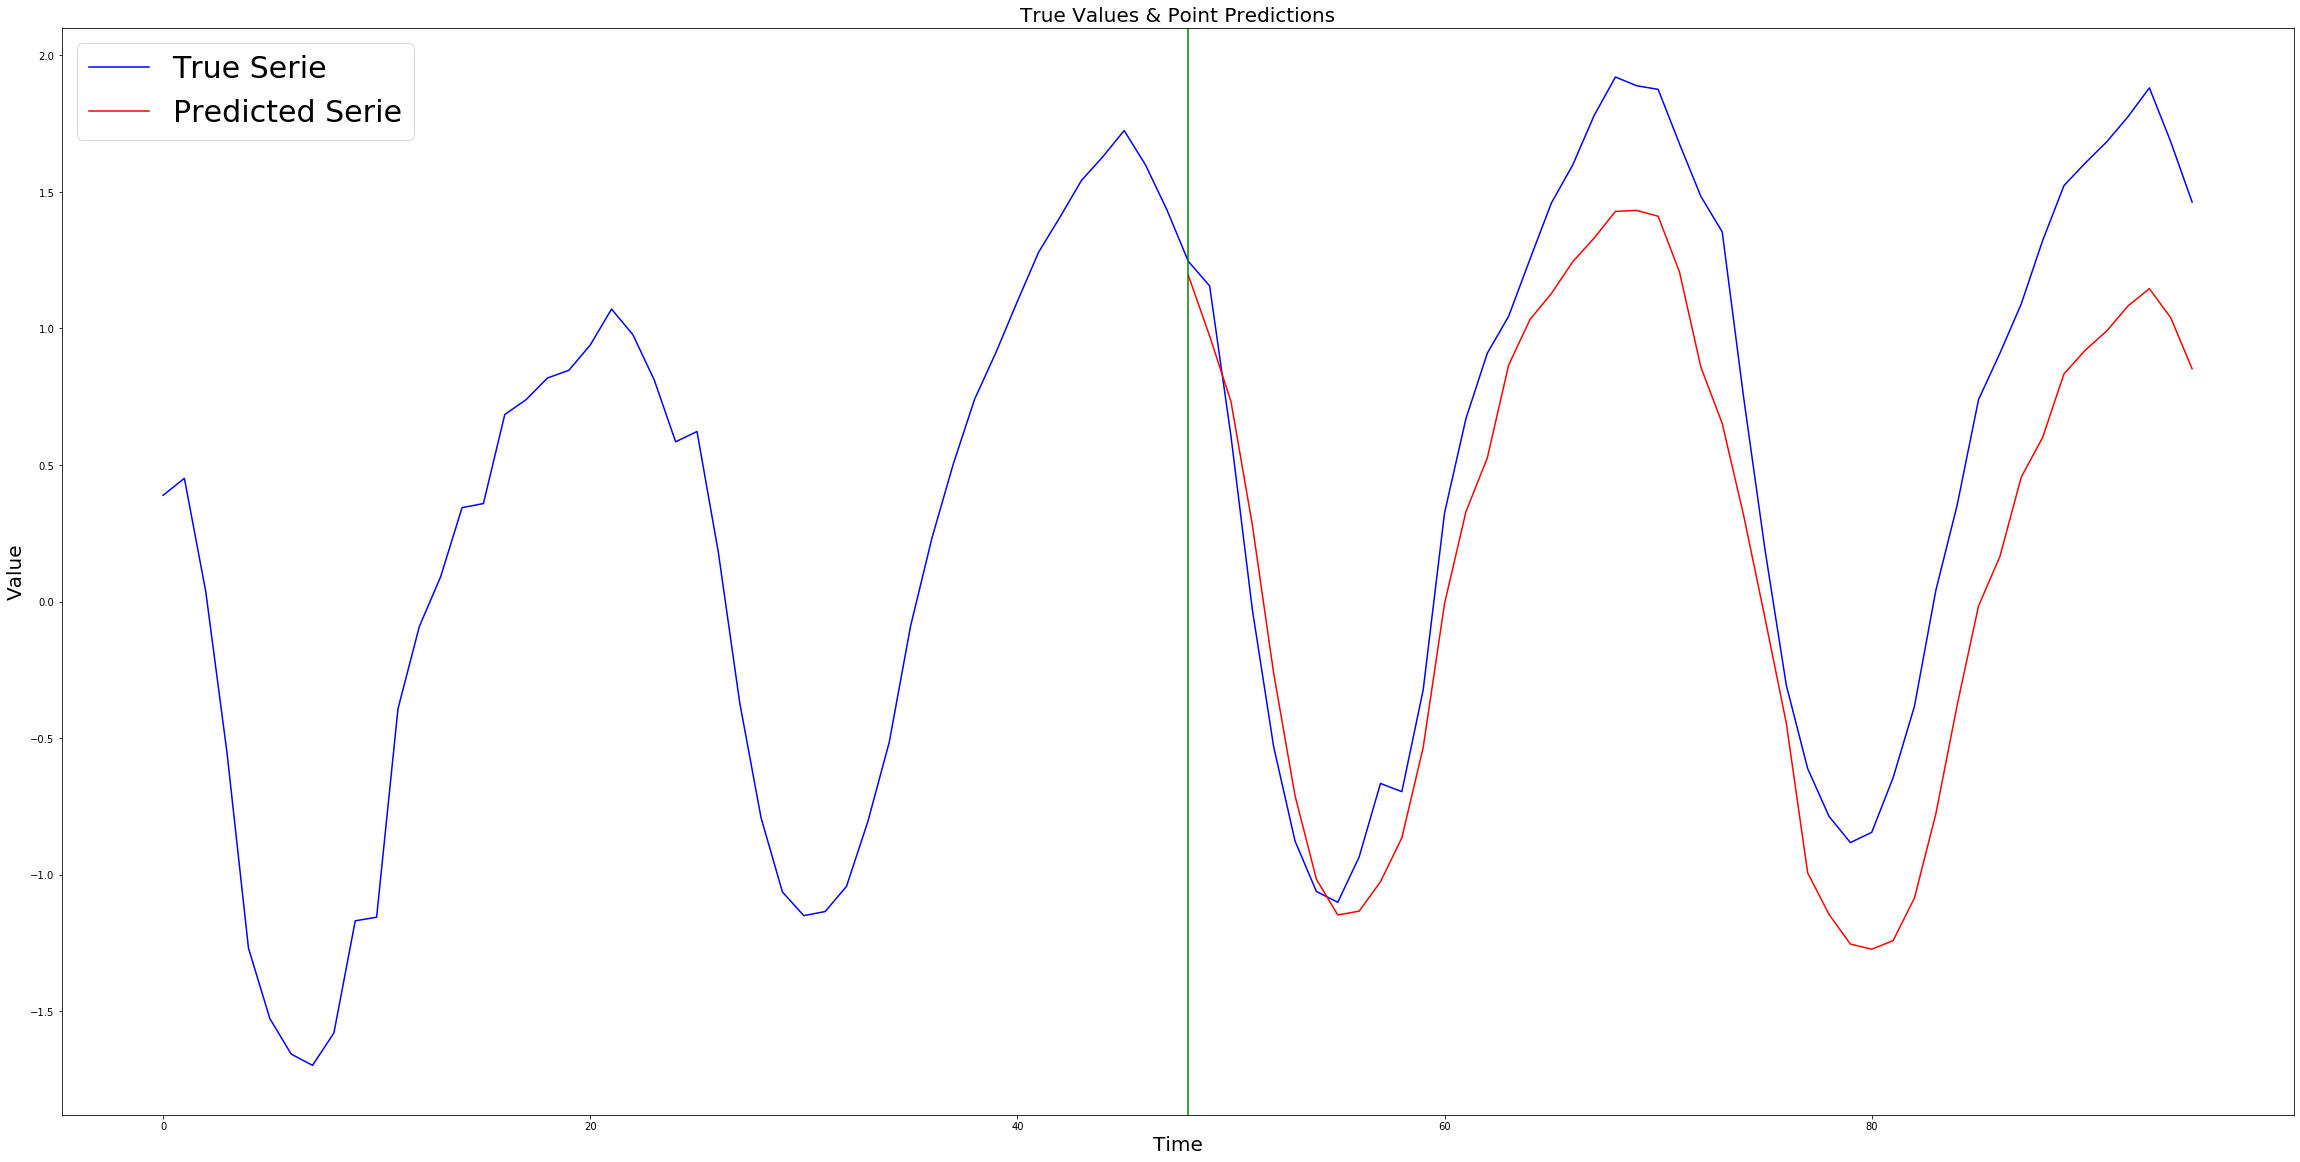

In [22]:
IDX = 40
x = test_x[:BATCH_SIZE,:,:]
y = test_y[:BATCH_SIZE,:]
#============ Predict Test
predictedY = model.predict(x.reshape(BATCH_SIZE, LOOKBACK, -1 ))
#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(x[:,:,0], y[:,:48], predictedY[:,:48], serie_indx=IDX)

# Evaluate A Model Against An Error Function

In [2]:
MODEL_NUMBER = 3
MODEL_BASE_DIR = '../models/with_diff/3-LSTM'
hyperparameters, training_error, test_error, validation_error = load_and_evaluate_model(f'{MODEL_BASE_DIR}/{MODEL_NUMBER}', 
                                                                       '../Dataset/Train/Hourly-train.csv', 
                                                                       '../Dataset/Test/Hourly-test.csv', mase)
print(f'Hyperparameters : {hyperparameters}')
print(f'Training Error For Model ({MODEL_NUMBER}) : {training_error}')
print(f'Test Error For Model ({MODEL_NUMBER}) : {test_error}')
print(f'Validation Error For Model ({MODEL_NUMBER}) : {validation_error}')

Loaded model from disk
Hyperparameters : {'epochs': 100, 'batch_size': 50, 'hidden_layer_size': 50, 'lookback': 48, 'loss': 'smape', 'dropout_ratio': 0.3, 'features_number': 2, 'output_size': 96}
Training Error For Model (3) : 0.8042
Test Error For Model (3) : 0.8731
Validation Error For Model (3) : 0.95
